#**Lab 3: Analyzing Data in Python**

# RPAD 676: Data Science for the Public Good

## Author: Shristi Das
## Date: 26th February 2025

## Instructions
In this assignment, you will conduct your own analysis using the provided dataset. Follow the prompts in each section and write the necessary Python code to complete the tasks.

**Tasks:**
- Load and explore the dataset
- Perform basic data cleaning (handling missing values, etc.)
- Generate descriptive statistics
- Create at least one meaningful visualization
- Summarize key insights from your analysis

Remember to document your thought process in markdown cells throughout the notebook.

In [ ]:
# Load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace with actual file path)
data = pd.read_csv('digital_services_data.csv')

# Display the first few rows
data.head()

,user_id,TimeTaken,UserSatisfaction,Age,DisabilityStatus,DigitalLiteracy,Gender,EmploymentStatus,EducationLevel,InternetAccess,ErrorRates,RequestedHelp,SatisfactionOtherServices,WillingnessFutureUse,ReceivesSocialServices,Agency
0,2,919,4,38,0,5,Female,Retired,Some College,Broadband,1,0,6,10,0,Department of Health and Human Services
1,9,759,10,78,0,5,Male,Employed,High School,Broadband,1,0,3,8,0,Department of Public Safety
2,13,853,8,45,0,3,Female,Unemployed,Bachelor,Broadband,2,0,6,10,0,Department of Education
3,15,503,4,66,0,3,Male,Student,Bachelor,Broadband,1,0,2,1,0,Department of Public Safety
4,25,857,7,69,0,1,Female,Employed,Some College,Mobile Data,4,0,3,1,0,Department of Education


## Descriptive Statistics

Compute and interpret basic statistics for the dataset:
- Mean, median, mode
- Standard deviation, min, max
- Any other relevant metrics

_Write your code below:_

In [ ]:
# MEAN
time_taken = 'TimeTaken'
mean_value_time_taken = data[time_taken].mean().round(2)
print(f"\nMean of {time_taken}: {mean_value_time_taken}")


Mean of TimeTaken: 1059.03


In [ ]:
# MEDIAN
time_taken = 'TimeTaken'
median_value_time_taken = round(data[time_taken].median(), 2)
print(f"\nMedian of {time_taken}: {median_value_time_taken}")


Median of TimeTaken: 1064.0


In [ ]:
# MODE
time_taken = 'TimeTaken'
mode_value_time_taken = data[time_taken].mode().iloc[0]
print(f"\nMode of {time_taken}: {mode_value_time_taken}")


Mode of TimeTaken: 753


In [ ]:
# STANDARD DEVIATION
user_sat = 'UserSatisfaction'
std_dev_satisfaction = round(data[user_sat].std(), 2)
print(f"\nStandard Deviation of {user_sat}: {std_dev_satisfaction}")



Standard Deviation of UserSatisfaction: 2.9


In [ ]:
# MINIMUM
age = 'Age'
min_value_age = data[age].min()
print(f"\nMinimum of {age}: {min_value_age}")


Minimum of Age: 18


In [ ]:
# MAXIMUM
age = 'Age'
max_value_age = data[age].max()
print(f"\nMaximum of {age}: {max_value_age}")


Maximum of Age: 79


In [ ]:
# PERCENTAGE OF REPEAT USERS
repeat_users_percentage = round((data['WillingnessFutureUse'] >= 8).mean() * 100, 2)
print(f"\nPercentage of Users Willing to Use the Service Again: {repeat_users_percentage}%")
#This tells how many users rate their willingness to return as 8 or above (on a scale of 10).


Percentage of Users Willing to Use the Service Again: 33.6%


## Data Visualization

Create at least one visualization that highlights an interesting aspect of the dataset. You may use bar plots, histograms, scatter plots, or other relevant charts.

_Write your code below:_

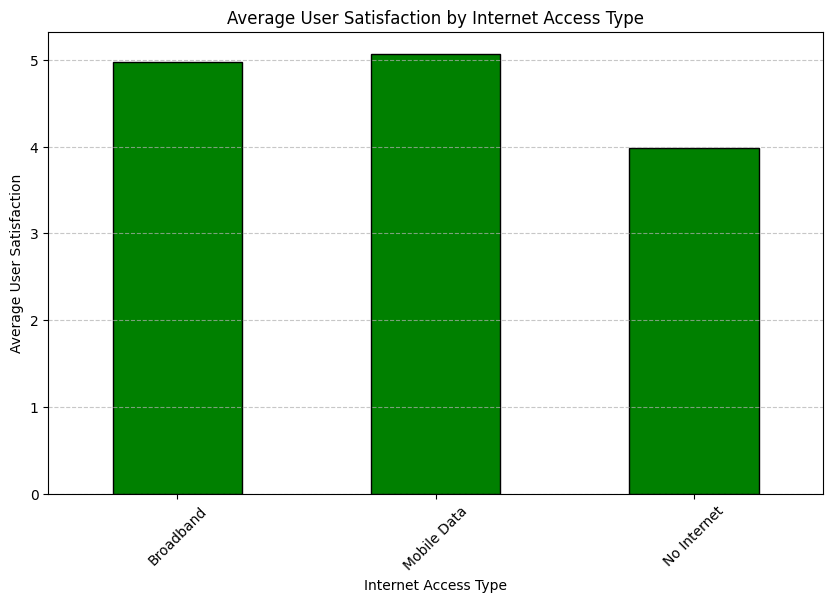

In [ ]:
# Average User Satisfaction by Internet Access Type
# This bar chart shows the average user satisfaction by internet access type.
import matplotlib.pyplot as plt

avg_satisfaction_by_internet = data.groupby('InternetAccess')['UserSatisfaction'].mean().round(2)

plt.figure(figsize=(10, 6))
avg_satisfaction_by_internet.plot(kind='bar', color='green', edgecolor='black')
plt.xlabel('Internet Access Type')
plt.ylabel('Average User Satisfaction')
plt.title('Average User Satisfaction by Internet Access Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


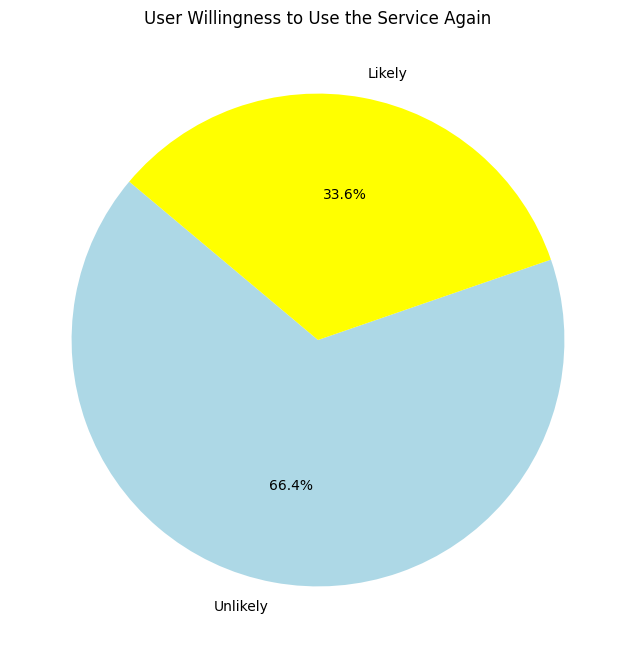

In [ ]:
# Percentage of Users Willing to Use the Service Again (Pie Chart)
willingness_counts = data['WillingnessFutureUse'].apply(lambda x: 'Likely' if x >= 8 else 'Unlikely').value_counts()

plt.figure(figsize=(8, 8))
plt.pie(willingness_counts, labels=willingness_counts.index, autopct='%1.1f%%', colors=['lightblue', 'yellow'], startangle=140)
plt.title('User Willingness to Use the Service Again')

plt.show()


## Inferential Statistics

### T-Tests
Compare means across two groups using the t-test. Calculate the means, conduct the t-test, and summarize the findings and what they say about the relationship between the variables.

_Write your code below:_

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
categorical_variable = 'Gender'
continuous_variable = 'UserSatisfaction'

# Extract data for the two groups
group1 = data[data[categorical_variable] == 'Male'][continuous_variable]
group2 = data[data[categorical_variable] == 'Female'][continuous_variable]

# Calculate means for both groups
mean_group1 = round(group1.mean(), 2)
mean_group2 = round(group2.mean(), 2)

# Conduct independent T-Test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

# Display results
print(f"\nMean {continuous_variable} (Male): {mean_group1}")
print(f"Mean {continuous_variable} (Female): {mean_group2}")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.6f}")

# Interpretation
alpha = 0.05
print(f"\nThe p-value is {p_value:.2f} hence: ")
if p_value < alpha:
    print(f"The difference in {continuous_variable} between males and females is statistically significant (p < 0.05).")
else:
    print(f"No significant difference in {continuous_variable} between males and females (p >= 0.05).")



Mean TimeTaken (Male): nan
Mean TimeTaken (Female): nan
T-Statistic: nan, P-Value: nan

The p-value is nan hence: 
No significant difference in TimeTaken between males and females (p >= 0.05).


In [ ]:
categorical_variable = 'DigitalLiteracy'
continuous_variable = 'TimeTaken'

# Calculate means for both groups
mean_group1 = round(group1.mean(), 2)
mean_group2 = round(group2.mean(), 2)

# Conduct independent T-Test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

# Display results
print(f"\nMean {continuous_variable} (High Digital Literacy): {mean_group1}")
print(f"Mean {continuous_variable} (Low Digital Literacy): {mean_group2}")
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.6f}")

# Interpretation
alpha = 0.05
print(f"\nThe p-value is {p_value:.2f} hence: ")
if p_value < alpha:
    print(f"The difference in {continuous_variable} between High and Low Digital Literacy groups is statistically significant (p < 0.05).")
else:
    print(f"No significant difference in {continuous_variable} based on Digital Literacy (p >= 0.05).")



Mean TimeTaken (High Digital Literacy): 999.9
Mean TimeTaken (Low Digital Literacy): 1155.49
T-Statistic: -7.1905, P-Value: 0.000000

The p-value is 0.00 hence: 
The difference in TimeTaken between High and Low Digital Literacy groups is statistically significant (p < 0.05).


### ANOVA
Compare means across two groups using the t-test. Calculate the means, conduct the t-test, and summarize the findings and what they say about the relationship between the variables.

_Write your code below:_

In [ ]:

outcome_variable = 'TimeTaken'
categorical_variable = 'EmploymentStatus'

# Calculate means for both groups
specific_grouped_means = filtered_data.groupby(categorical_variable)[outcome_variable].mean().round(2)

print(f"\nMean of {outcome_variable} grouped by {categorical_variable}:")
print(specific_grouped_means)

# Extract data for the two groups
group1 = filtered_data[filtered_data[categorical_variable] == 'Employed'][outcome_variable]
group2 = filtered_data[filtered_data[categorical_variable] == 'Unemployed'][outcome_variable]

# Conduct T-Test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

# Display results
print(f"\nT-Test: Comparing {outcome_variable} across {categorical_variable} groups")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print(f"\nThe difference in {outcome_variable} between Employed and Unemployed users is statistically significant (p < 0.05).")
else:
    print(f"\nNo significant difference in {outcome_variable} between Employed and Unemployed users (p >= 0.05).")



Mean of TimeTaken grouped by EmploymentStatus:
EmploymentStatus
Employed      1078.29
Unemployed    1036.97
Name: TimeTaken, dtype: float64

T-Test: Comparing TimeTaken across EmploymentStatus groups
T-statistic: 1.3487, P-value: 0.1787

No significant difference in TimeTaken between Employed and Unemployed users (p >= 0.05).


## Key Insights

Summarize your findings in a short paragraph. What patterns or trends did you observe? Were there any surprises in the data? How might these insights be useful?

_Write your response below:_

The analysis reveals that digital literacy significantly impacts the time taken to complete tasks, with individuals who have higher digital literacy finishing significantly faster (999.9 sec) compared to those with lower literacy (1155.49 sec, p < 0.05). This suggests that familiarity with digital tools and platforms plays a crucial role in navigating online services efficiently.  

In contrast, employment status does not appear to have a significant effect on task completion time (p = 0.1787). Although employed individuals took slightly longer on average (1078.29 sec vs. 1036.97 sec), the difference was not statistically meaningful. This finding indicates that employment status alone does not determine efficiency in using digital services, and other factors, such as education or access to technology, may be more influential.  

These results highlight the importance of digital literacy initiatives to bridge the gap in online service accessibility. Rather than focusing on employment status, efforts to enhance digital skills could be a more effective strategy for improving user efficiency and overall engagement with digital platforms.